<a href="https://colab.research.google.com/github/m677s345/EECS731_Project2_MS_Ole_Bill/blob/master/EECS731_Project2_oleBill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


     |████████████████████████████████| 51kB 2.3MB/s 
project_name [project_name]: EECS731_Project2_oleBill
repo_name [eecs731_project2_olebill]: EECS731_Project2_oleBill
author_name [Your name (or your organization/company/team)]: Matt Stalcup
description [A short description of the project.]: 
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: 
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 


# Data Cleaning and visualization

The first step is do some data visualization on the dataset to see if there is any trends we can link before we begin. Below we see that we can see what actors are present in a play by comparing their names to the play names. I.E Hamlet is in Hamlet. This will allow us to sort the players into plays and also tells us that plays are a useful feature.


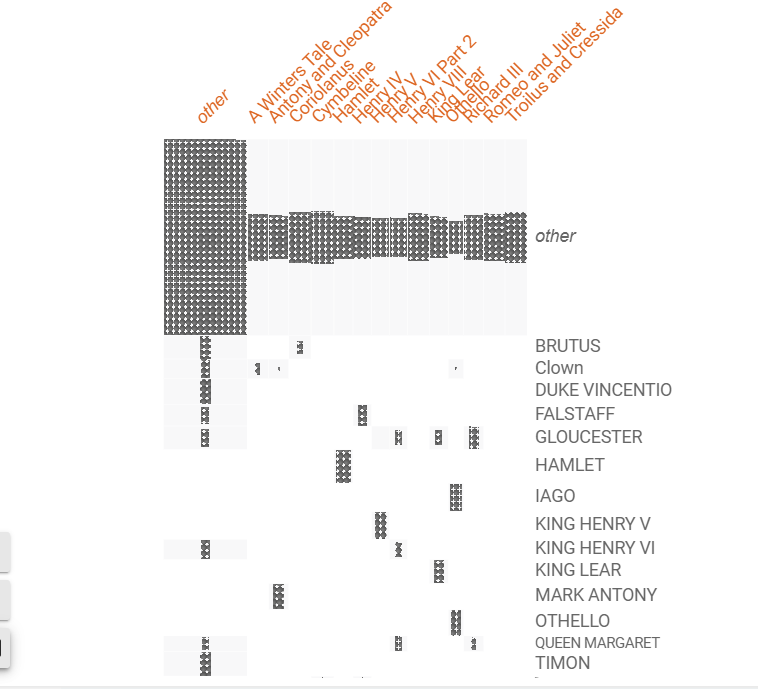

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.cm as cm

data=pd.read_csv('/content/EECS731_Project2_oleBill/data/raw/Shakespeare_data.csv',index_col=0, header=0 )#reads data from Shakespears plays fills in missing data with NaN
plays_df = data[pd.notna(data['ActSceneLine'])]                                                       #Ridding the dataset of scene information like what caracters come and go
plays_df[['Act','Scene','Line']] = plays_df['ActSceneLine'].str.split('.',expand= True).astype(float)     #Splits apart the act scene and line into different dataframe column
plays_df = plays_df.drop('ActSceneLine',axis=1)                                                           #drops the actseneline column because we have just split it up 
plays_df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
Dataline,,,,,,,
4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,",1.0,1.0,1.0
5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,",1.0,1.0,2.0
6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils,1.0,1.0,3.0
7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.,1.0,1.0,4.0
8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil,1.0,1.0,5.0
...,...,...,...,...,...,...,...
111391,A Winters Tale,38.0,LEONTES,"Is troth-plight to your daughter. Good Paulina,",5.0,3.0,179.0
111392,A Winters Tale,38.0,LEONTES,"Lead us from hence, where we may leisurely",5.0,3.0,180.0
111393,A Winters Tale,38.0,LEONTES,Each one demand an answer to his part,5.0,3.0,181.0


Another useful piece of information is the unbalanced nature of this dataset visualized below. We can see that there are some plays with signifagantly higher actor counts. I assume that in those plays there are more lines said. 

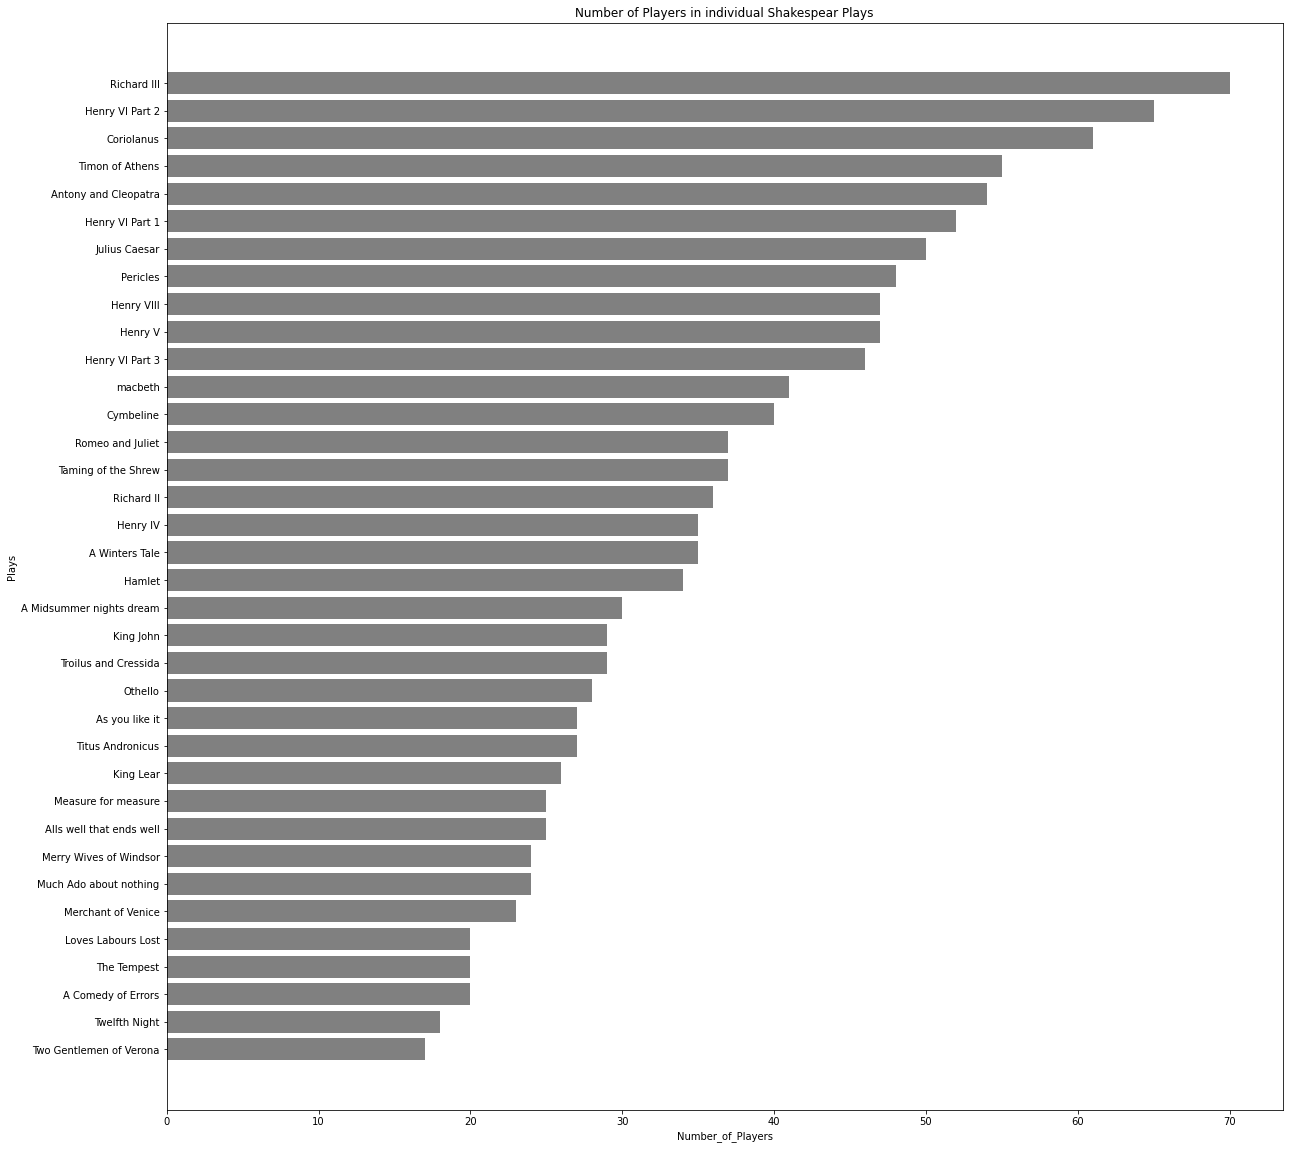

In [5]:
Players_num=plays_df.groupby(["Play"])['Player'].nunique().sort_values(ascending=True).to_frame()   #groups the dataset by plays, counts the unique players, and sorts low to high 
Players_num['Play']=Players_num.index.tolist()                                                      #converts the Play index to a list
Players_num.columns=['Number_of_Players','Play']                                                    #Assigns column titles
Players_num.index=np.arange(0,len(Players_num))                                                     #reindexes the Player_numbers  



plt.figure(figsize=(20,20))
plt.barh(width='Number_of_Players',y='Play',data=Players_num, color='grey')
plt.xlabel('Number_of_Players')
plt.title('Number of Players in individual Shakespear Plays')
plt.ylabel('Plays')
plt.show()

# Feature Engineering

The first thought was to encode the text and use it to tag players based on an encoded representation of the words they said. This would be computationaly intense and since every line is already encoded by the format of the play ( Play.Act.Linenumber) there is no reason to encode the text. An easy way forward is splitting the actsceneline feature into three seperate features so there is three features for the algorithm to use to arrive at the target value. However, the actors and the plays need to be encoded because as is they are strings. The plays will become a feature to feed into the ML algorythm and the Players will be our target.

In [6]:
#Encodes the play titles as numbers and reassigns the encoded value in the appropriate column
play_lables= LabelEncoder()                                                     #creates a variable that I can use to encode or decode play lables  
play_lables.fit(plays_df['Play'])
plays_df['Play']=play_lables.transform(plays_df['Play'])
#Encodes the player names as numbers and reassigns the encoded value in the appropriate column
player_lables=LabelEncoder()                                                    #creates a variable that I can use to encode or decode play lables       
plays_df['Player']=plays_df['Player'].astype(str)
player_lables.fit(plays_df['Player'])
plays_df['Player']=player_lables.transform(plays_df['Player'])


We can see that we have successfully encoded the plays and the players in the table below as well as split the act scene line into 3 seperate columns

In [7]:
plays_df

,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
Dataline,,,,,,,
4,9,1.0,457,"So shaken as we are, so wan with care,",1.0,1.0,1.0
5,9,1.0,457,"Find we a time for frighted peace to pant,",1.0,1.0,2.0
6,9,1.0,457,And breathe short-winded accents of new broils,1.0,1.0,3.0
7,9,1.0,457,To be commenced in strands afar remote.,1.0,1.0,4.0
8,9,1.0,457,No more the thirsty entrance of this soil,1.0,1.0,5.0
...,...,...,...,...,...,...,...
111391,2,38.0,494,"Is troth-plight to your daughter. Good Paulina,",5.0,3.0,179.0
111392,2,38.0,494,"Lead us from hence, where we may leisurely",5.0,3.0,180.0
111393,2,38.0,494,Each one demand an answer to his part,5.0,3.0,181.0


Next we assign variables to the features and the target values then split the training and testing set. I chose to take 20 percent of the dataset as testing.

In [8]:
Targets=plays_df['Player']                   
Class_features=plays_df[['Act','Scene','Line','Play']]
x_train, x_test, y_train, y_test = train_test_split(Class_features, Targets, test_size=(0.2)) 


# Classification Techniques


*   Naive Byes 
*   Random Forest




Naive Byes Classifier: I chose to use the catergoircal NB for this application because it is sutable for classification where the features are catergorically distributed either by plays or by lines. However, verses the complement NB, there is no difference suggesting that this has no effect on the NB solution.

In [18]:
from sklearn.naive_bayes import CategoricalNB
from sklearn import svm
model=CategoricalNB()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
labeled_prediction=player_lables.inverse_transform(y_predict)
labeled_prediction

array(['OCTAVIUS CAESAR', 'GLOUCESTER', 'OTHELLO', ..., 'IAGO',
       'DROMIO OF SYRACUSE', 'JULIA'], dtype=object)

In [19]:
accuracy_score(player_lables.inverse_transform(y_test), labeled_prediction)

0.32038419476011604

In [21]:
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
model=CategoricalNB()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
labeled_prediction=player_lables.inverse_transform(y_predict)
labeled_prediction

array(['OCTAVIUS CAESAR', 'GLOUCESTER', 'OTHELLO', ..., 'IAGO',
       'DROMIO OF SYRACUSE', 'JULIA'], dtype=object)

In [22]:
accuracy_score(player_lables.inverse_transform(y_test), labeled_prediction)

0.32038419476011604

Random Forest Classifier 


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model=RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
labeled_prediction=player_lables.inverse_transform(y_predict)
labeled_prediction


array(['MENENIUS', 'MACDUFF', 'KING', ..., 'LARTIUS', 'FERDINAND',
       'HECTOR'], dtype=object)

In [10]:
accuracy_score(player_lables.inverse_transform(y_test), labeled_prediction)

0.7181779278208359

In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
labeled_prediction=player_lables.inverse_transform(y_predict)
labeled_prediction

array(['MENENIUS', 'MACDUFF', 'KING', ..., 'LARTIUS', 'FERDINAND',
       'HECTOR'], dtype=object)

In [14]:
accuracy_score(player_lables.inverse_transform(y_test), labeled_prediction)

0.7180352812514859